# 01 - Linear regression and polynomial regression

In [1]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Source of data set: World Bank Data Catalog at https://datacatalog.worldbank.org

In [3]:
raw_df = pd.read_csv('educationgdp.csv')
raw_df

Literacy Rate  GDP per capita
0         5.404650      188.661113
1        68.375328      305.549773
2        65.145370      534.951265
3        50.645168      565.800697
4        35.049999      572.427154
..             ...             ...
202      97.344856    66188.779400
203      99.916428    78643.550650
204      93.463966    85076.141500
205      98.867821    85975.024740
206      96.538490    93777.106800

[207 rows x 2 columns]

In [4]:
raw_df.shape

(207, 2)

In [5]:
raw_df = shuffle(raw_df)
raw_df

Literacy Rate  GDP per capita
190      94.503189    30437.221510
148      99.013153    10973.124500
169      98.991028    16298.478760
127      86.823181     8279.601739
71       87.506310     3264.537017
..             ...             ...
0         5.404650      188.661113
117      75.766823     7522.595344
172      98.949997    17112.821130
44       62.929710     1834.320625
50       53.497589     1892.095487

[207 rows x 2 columns]

In [6]:
X = np.array(raw_df['Literacy Rate']).reshape(-1,1)
Y = np.array(raw_df['GDP per capita']).reshape(-1,1)

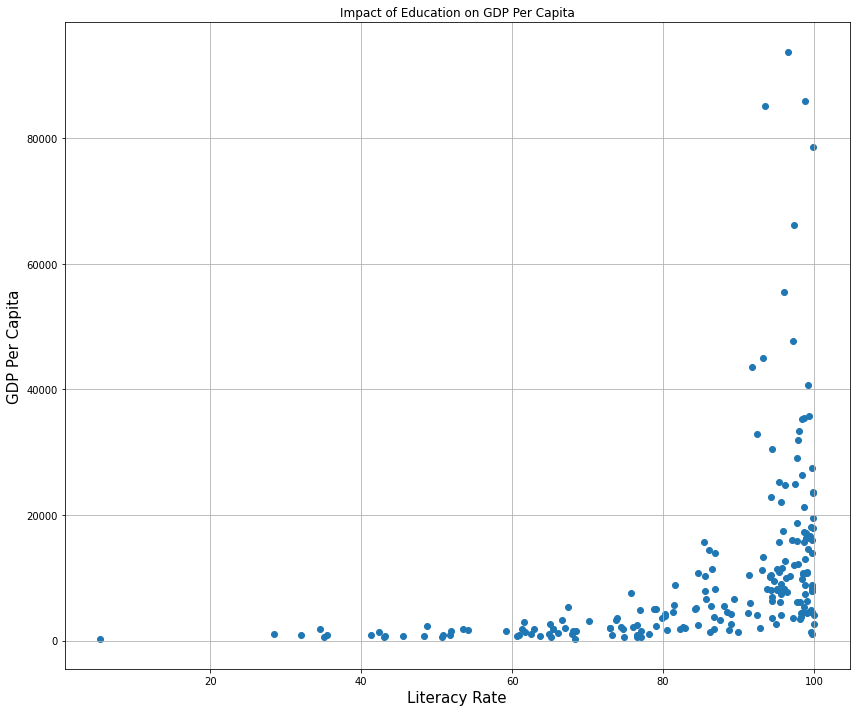

In [7]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel("Literacy Rate", fontsize=15)
ax.set_ylabel("GDP Per Capita", fontsize=15)
ax.set_title("Impact of Education on GDP Per Capita")
ax.grid(True)
fig.tight_layout()
plt.show()

In [8]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
Y_train = Y[:-20]
Y_test = Y[-20:]

Linear regression is  creating a linear function  of the form $\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$ where $\hat{y}$
 is the predicted value. Mathematically linear regression solves a problem of minimizing the error $\min_{w} || X w - \hat{y}||_2^2$

In [9]:
regr = linear_model.LinearRegression()

In [10]:
regr.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = regr.predict(X_test)

In [12]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[359.58379806]]


In [13]:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 419559624.74
Coefficient of determination: 0.10


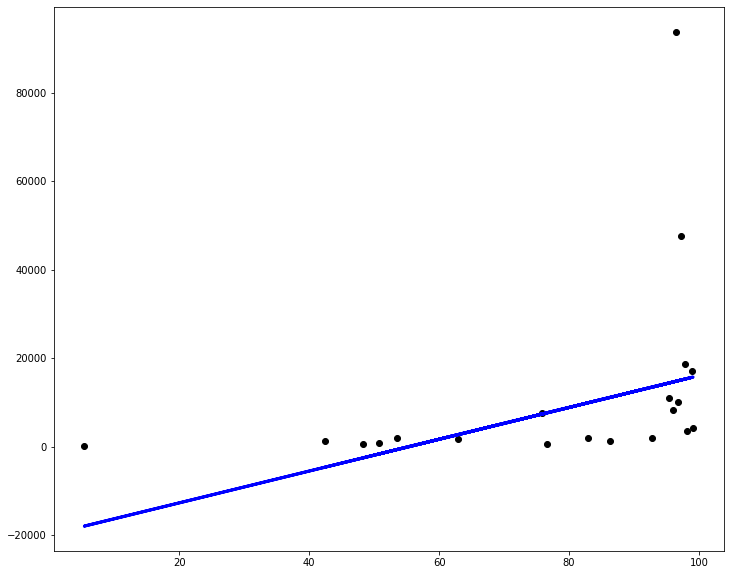

In [14]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

Lets say that our current Literacy rate is 50% and we want to tell the President that if he invests in education and pushes the Literacy reate to 70% the GDP per capita would rise to....

In [15]:
future = np.array([70]).reshape(-1,1)
future_gdppercapita = regr.predict(future)
future_gdppercapita

array([[5283.37762942]])

This is probably an exagerated prediction, since the linear prediction is not fitting the curve realistically.

A simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data: $\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

This is still a linear model: to see this, imagine creating a new set of features $z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$ and with this re-labeling of the data, our problem can be written as $\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$



In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Mean squared error: 406936074.16
Coefficient of determination: 0.13


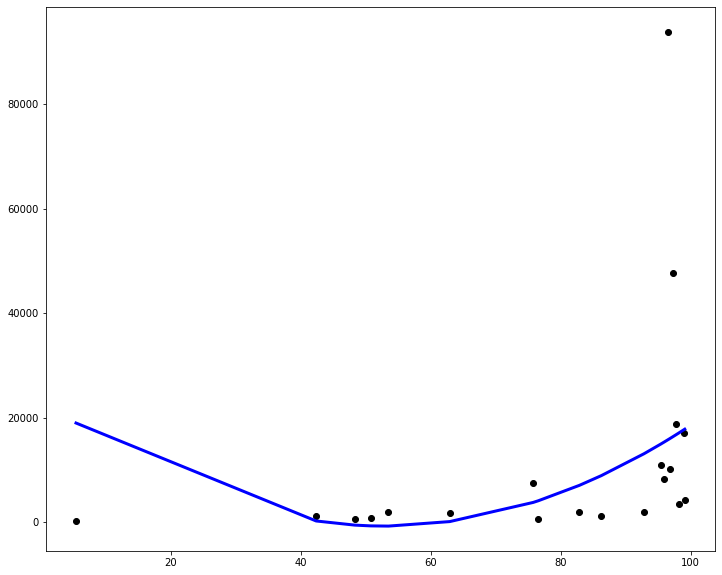

In [17]:
Y_pred2 = polyreg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred2))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred2))

a, b = zip(*sorted(zip(X_test,Y_pred2)))

plt.scatter(X_test, Y_test,  color='black')
plt.plot(a, b, color='blue', linewidth=3)


Mean squared error: 388539839.42
Coefficient of determination: 0.17


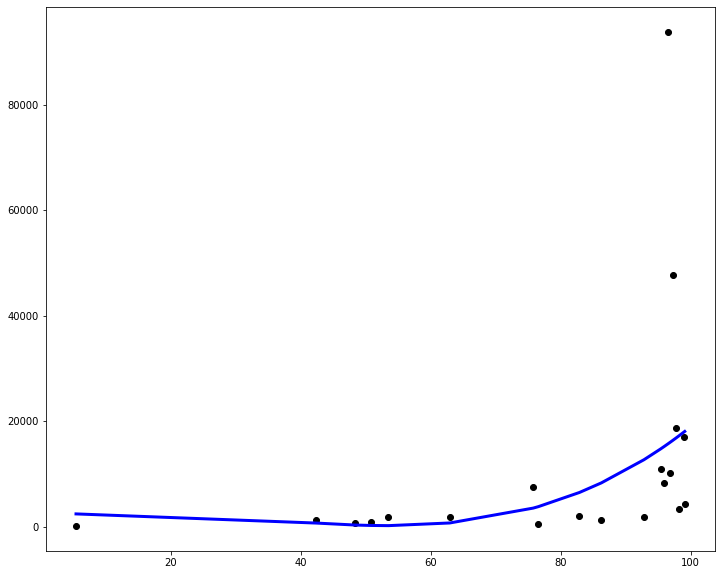

In [18]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)
Y_pred3 = polyreg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred3))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred3))

a, b = zip(*sorted(zip(X_test,Y_pred3)))

plt.scatter(X_test, Y_test,  color='black')
plt.plot(a, b, color='blue', linewidth=3)

With this model, we are more likely to predict a resonable GDP per capita when we increase our literacy rate to 70%

In [19]:
future = np.array([70]).reshape(-1,1)
future_gdppercapita = polyreg.predict(future)
future_gdppercapita

array([[1972.21481346]])

This cannot be extended indefinitely.  At some point, the curve will overfit.  

In [20]:
degree=10
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)
Y_pred9 = polyreg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred9))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred9))

a, b = zip(*sorted(zip(X_test,Y_pred9)))

plt.scatter(X_test, Y_test,  color='black')
plt.plot(a, b, color='blue', linewidth=3)

Mean squared error: 372039082.02
Coefficient of determination: 0.20
